# Roots of a second degree polynomial

Implementation of an algorithm which calculates the roots of a second degree polynomial, reducing the errors committed with the floating point arithmetic.

Considering p(x) = $x^2 - 2bx + c$. The roots $x_1$ e $x_2$ are calculated in the following way: 
- $x_1 = b + \sqrt{b^2 - c}$
- $x_2 = b - \sqrt{b^2 - c}$

These formulas' problems are the following: 
1. If b < 0: $x_1$ calculation will present another subtraction
2. If b > 0: $x_2$ calculation will present the same problem discussed in point 1
3. The power could generate an overflow

Subtracion is an operation that could cause a lot of trouble in terms of roundings operated by the calculator, so we have to put a limit to its use.

In [1]:
import numpy as np

# considering p(x) = x^2 - 2*6x + 7
b = 6
c = 7

## Subtraction problem solution

A possible solution to the first problem is to use this formula: $x_1*x_2 = c$, in order to put: 
- $x_1 = c / x_2$
- $x_2 = c/x_1$

The first and necessary step is to calculate one of the two $x$, using the basic formulas (the ones with sqrt) but it is **extremely important to choose the right one according to the value of b.** 

In [2]:
rad = (lambda b, c: np.sqrt((b**2) - c))

if b > 0:
    x_1 = b + rad(b, c)
    x_2 = c / x_1
else: 
    x_2 = b - rad(b, c)
    x_1 = c / x_2

print("x1: {}\nx2: {}".format(x_1, x_2))

x1: 11.385164807134505
x2: 0.6148351928654959


If b > 0 then it is used: $x_1 = b + \sqrt{b^2 - c}$. 

Similarly if b < 0, it is used: $x_2 = b - \sqrt{b^2 - c}$.

In this way the errors introduced by operations with different signs are reduced, and the result is far more accurate.

## Overflow solution

To solve the overflow problem we have to completely eliminate the power operation on b.

We can operate this transformation inside the square root: $\sqrt{b^2 - c} = \sqrt{b^2(1 - c/b^2)} = b\sqrt{1 - (c/b) * (1/b)}$

Highlight $b^2$ it's possible to put it OUTSIDE the square root (eliminating the power). We can now decompose the fraction $c/b^2$ into the product $(c/b * 1/b)$. In this way the overflow's errors on $b^2$ are eliminated.

In [3]:
rad = (lambda b, c: b * np.sqrt(1 - ((c/b)*(1/b))))

if b > 0:
    x_1 = b + rad(b, c)
    x_2 = c / x_1
else: 
    x_2 = b - rad(b, c)
    x_1 = c / x_2

print("x1: {}\nx2: {}".format(x_1, x_2))

x1: 11.385164807134505
x2: 0.6148351928654959


## Graph of the roots

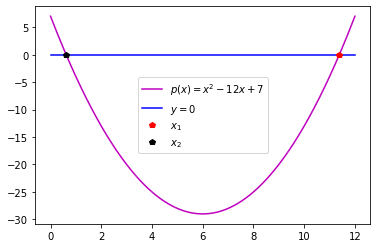

In [7]:
import matplotlib.pyplot as plt

func = (lambda x, b, c: np.power(x, 2) + (-2*b*x) + c) # function
x1 = 11.385164807134505
x2 = 0.6148351928654959

pts = np.linspace(0, 12, 300)
plt.plot(pts, func(pts, b, c), '-m', label='$p(x) = x^2 -12x +7$')
plt.plot(pts,0*pts,'b',label = '$y=0$')
plt.plot(x1, 0,'pr', label = '$x_1$') # disegno la prima radice
plt.plot(x2, 0, 'pk', label = '$x_2$') # disegno la seconda radice
plt.legend()